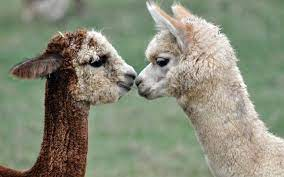

In [1]:
from PIL import Image
import numpy as np

# Загрузка изображения
img = Image.open('lama.jpg')
img

In [2]:
# Преобразование изображения в numpy массив
X = np.array(img, dtype=np.float32)

# SVD разложение
U_r, S_r, V_r = np.linalg.svd(X[:,:,0], full_matrices=False)
U_g, S_g, V_g = np.linalg.svd(X[:,:,1], full_matrices=False)
U_b, S_b, V_b = np.linalg.svd(X[:,:,2], full_matrices=False)

X

array([[[127., 147., 120.],
        [127., 147., 120.],
        [127., 147., 120.],
        ...,
        [ 99., 122.,  94.],
        [ 98., 123.,  94.],
        [ 98., 123.,  94.]],

       [[127., 147., 120.],
        [127., 147., 120.],
        [127., 147., 120.],
        ...,
        [100., 123.,  95.],
        [ 99., 124.,  95.],
        [ 99., 124.,  95.]],

       [[127., 147., 120.],
        [127., 147., 120.],
        [127., 147., 120.],
        ...,
        [102., 125.,  97.],
        [101., 126.,  97.],
        [101., 126.,  97.]],

       ...,

       [[ 41.,  21.,  12.],
        [ 37.,  17.,   6.],
        [ 39.,  19.,  10.],
        ...,
        [206., 199., 181.],
        [223., 216., 198.],
        [221., 214., 196.]],

       [[ 72.,  54.,  44.],
        [ 44.,  27.,  17.],
        [ 29.,  11.,   1.],
        ...,
        [211., 204., 186.],
        [214., 207., 189.],
        [206., 199., 181.]],

       [[ 60.,  35.,  30.],
        [ 78.,  55.,  49.],
        [ 42.,  

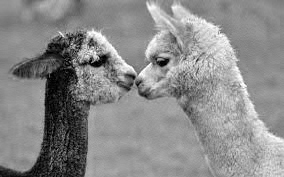

In [3]:
# Функция для сжатия изображения, оставляя только k сингулярных значений
def compress_svd(U, S, V, k):
    compressed_img = np.dot(U[:, :k], np.dot(np.diag(S[:k]), V[:k, :]))
    compressed_img = np.clip(compressed_img, 0, 255).astype(np.uint8)
    return compressed_img

num_singular_values_to_keep = [1, 2, 10, 30, 100]
# Сжатие изображения для каждого значения
compressed_images = []
for k in num_singular_values_to_keep:
    compressed_r = compress_svd(U_r, S_r, V_r, k)
    compressed_g = compress_svd(U_g, S_g, V_g, k)
    compressed_b = compress_svd(U_b, S_b, V_b, k)
    compressed_img = np.stack((compressed_r, compressed_g, compressed_b), axis=-1)
    compressed_images.append(compressed_img)


compr_img_g = Image.fromarray(compressed_g)
compr_img_g

Сохранено сжатое изображение с 1 сингулярными значениями.
Сохранено сжатое изображение с 2 сингулярными значениями.
Сохранено сжатое изображение с 10 сингулярными значениями.
Сохранено сжатое изображение с 30 сингулярными значениями.
Сохранено сжатое изображение с 100 сингулярными значениями.


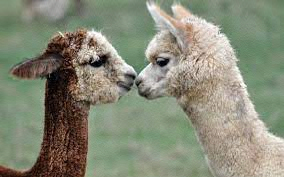

In [4]:
for k, compressed_img in zip(num_singular_values_to_keep, compressed_images):
    compressed_img_pil = Image.fromarray(compressed_img)
    compressed_img_pil.save(f'compressed_{k}.jpg')
    print(f"Сохранено сжатое изображение с {k} сингулярными значениями.")

compressed_img_pil

6 пункт: Чем меньшую сингулярность мы задаем, тем меньше размер картинки. Но стоит отметить, что начиная с некоторых значений, размер сжатой картинки становится меньше размера исходной.